# 0. Install Dependencies

In [64]:
!pip install tensorflow==2.10.0
!pip install gym
!pip install keras
!pip install keras-rl2
!pip install matplotlib #rendering
!pip install gym[classic_control] # rendering or try with pygame

     ---------------------------------------- 4.8/4.8 MB 5.4 MB/s eta 0:00:00


# 1. Test Random Environment with OpenAI Gym

In [56]:
import gym 
import random


In [74]:
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

In [59]:
env = gym.make('CartPole-v1', render_mode="rgb_array") # gym library, make method
states = env.observation_space.shape[0] # 4 states for this environment (can't change the 0)
actions = env.action_space.n # 2 actions

In [60]:
states

4

In [61]:
actions

2

## 1.1 How to check random actions without DL Code

In [72]:
# new version with terminated and truncated 
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset() #initial for each episode
    terminated = False
    score = 0 
    
    while not terminated:
        env.render() # render the CartPole
        action = random.choice([0,1]) # 0,1 left or right
        observation, reward, terminated, truncated ,info   = env.step(action) # applying the action to the env and get the state, reward,
                                                        #if done the while loop stops, otherwise information
        score+=reward #based on our step we get a reward till it's done
    print('Episode:{} Score:{}'.format(episode, score))

Episode:1 Score:16.0
Episode:2 Score:40.0
Episode:3 Score:24.0
Episode:4 Score:16.0
Episode:5 Score:25.0
Episode:6 Score:19.0
Episode:7 Score:15.0
Episode:8 Score:33.0
Episode:9 Score:13.0
Episode:10 Score:15.0


The score can be 200, these scores are with random function

In [76]:
env.step(action)

(array([-0.04473784,  0.15982774, -0.04697357, -0.2796378 ], dtype=float32),
 1.0,
 False,
 False,
 {})

observation (object) – this will be an element of the environment’s observation_space. This may, for instance, be a numpy array containing the positions and velocities of certain objects.

reward (float) – The amount of reward returned as a result of taking the action.

terminated (bool) – whether a terminal state (as defined under the MDP of the task) is reached. In this case further step() calls could return undefined results.

truncated (bool) – whether a truncation condition outside the scope of the MDP is satisfied. Typically a timelimit, but could also be used to indicate agent physically going out of bounds. Can be used to end the episode prematurely before a terminal state is reached.

info (dictionary) – info contains auxiliary diagnostic information (helpful for debugging, learning, and logging). This might, for instance, contain: metrics that describe the agent’s performance state, variables that are hidden from observations, or individual reward terms that are combined to produce the total reward. It also can contain information that distinguishes truncation and termination, however this is deprecated in favour of returning two booleans, and will be removed in a future version.

In [68]:
import matplotlib.pyplot as plt
import gym
from IPython import display



# (1.2) With rendering the CartPole

Episode:1 Score:14.0


KeyboardInterrupt: 

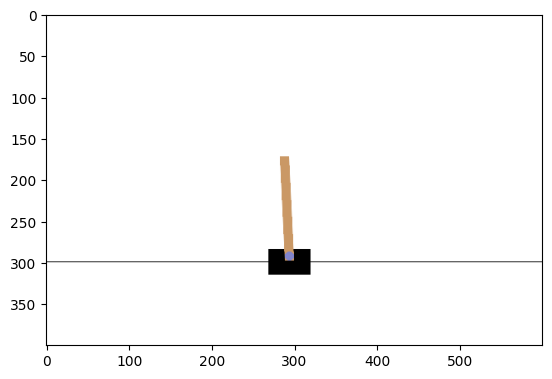

In [75]:
# new version with terminated and truncated 
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset() #initial for each episode
    terminated = False
    score = 0 
    
    while not terminated:
       # env.render() # render the CartPole
        plt.imshow(env.render())
        display.display(plt.gcf())    
        display.clear_output(wait=True)
        action = random.choice([0,1]) # 0,1 left or right
        observation, reward, terminated, truncated ,info   = env.step(action) # applying the action to the env and get the state, reward,
                                                        #if done the while loop stops, otherwise information
        score+=reward #based on our step we get a reward till it's done
    print('Episode:{} Score:{}'.format(episode, score))

# 2. Create a Deep Learning Model with Keras

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [8]:
def build_model(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [20]:
model = build_model(states, actions)

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                120       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 50        
Total params: 770
Trainable params: 770
Non-trainable params: 0
_________________________________________________________________


# 3. Build Agent with Keras-RL

In [5]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [6]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [25]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=50000, visualize=False, verbose=1)

Training for 50000 steps ...
Interval 1 (0 steps performed)
10000/10000 [==============================] - 49s 5ms/step - reward: 1.0000
51 episodes - episode_reward: 193.118 [58.000, 200.000] - loss: 5.376 - mae: 39.195 - mean_q: 78.705

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 49s 5ms/step - reward: 1.0000
54 episodes - episode_reward: 185.056 [64.000, 200.000] - loss: 7.553 - mae: 40.527 - mean_q: 81.044

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 51s 5ms/step - reward: 1.0000
52 episodes - episode_reward: 193.462 [33.000, 200.000] - loss: 8.935 - mae: 40.588 - mean_q: 81.322

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 53s 5ms/step - reward: 1.0000
50 episodes - episode_reward: 200.000 [200.000, 200.000] - loss: 11.357 - mae: 41.679 - mean_q: 83.338

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 54s 5ms/step - reward: 1.0000
done,

In [27]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

Testing for 100 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200
Episode 16: reward: 200.000, steps: 200
Episode 17: reward: 200.000, steps: 200
Episode 18: reward: 200.000, steps: 200
Episode 19: reward: 200.000, steps: 200
Episode 20: reward: 200.000, steps: 200
Episode 21: reward: 200.000, steps: 200
Episode 22: reward: 200.000, steps: 200
Episode 23: reward: 200.000, steps: 200
Episode 24: reward: 200.000, steps: 200
Episode 25: reward: 

In [29]:
_ = dqn.test(env, nb_episodes=15, visualize=True)

Testing for 15 episodes ...
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
Episode 6: reward: 200.000, steps: 200
Episode 7: reward: 200.000, steps: 200
Episode 8: reward: 200.000, steps: 200
Episode 9: reward: 200.000, steps: 200
Episode 10: reward: 200.000, steps: 200
Episode 11: reward: 200.000, steps: 200
Episode 12: reward: 200.000, steps: 200
Episode 13: reward: 200.000, steps: 200
Episode 14: reward: 200.000, steps: 200
Episode 15: reward: 200.000, steps: 200


# 4. Reloading Agent from Memory

In [30]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [31]:
del model
del dqn
del env

In [9]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [10]:
dqn.load_weights('dqn_weights.h5f')

In [11]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200
